# Unites States Aviation Accident Analysis

## Overview

This is an analysis of aviation accident data from the National Transportation Safety Board (NTSB) to identify trends and patterns in civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. The goal of this analysis is to provide insights that can inform safety measures and improve the overall safety of aviation operations.

### Business Problem

The aviation industry faces significant safety risks, and understanding the causes and patterns of accidents is crucial for reducing the likelihood of future incidents. By analyzing historical data on aviation accidents, we can identify common factors and trends that contribute to accidents, enabling the development of targeted safety initiatives to mitigate these risks that lead to loss of lives and financial loss.

### The Data

The [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) from the National Transportation Safety Board which contains information on civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. The data includes various features such as the probable cause of the `accident`, `location`, `date` and `details on the aircraft involved`.

In [32]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Converting the file into a pd data frame
aviation = '../dsc-phase-1-project-v3/data/Aviation_Data.csv'
df = pd.read_csv(aviation, engine = 'python')


In [34]:
contigency_dataset = df.copy()# copying original data set before cleaning

## Exploring the Data

In [35]:
#Get an Overview of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [36]:
df.shape


(90348, 31)

In [37]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [38]:
#identifying null values

df.isnull().sum()


Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [39]:
#checking for duplicates 

df.duplicated().sum()

1390

### Data Cleaning

In [40]:
#Drop duplicated items in a column
df = df.drop_duplicates(subset=['Accident.Number'])

In [41]:
#Dropping Unecessary Columns

df.drop(columns = ['Latitude','Longitude','FAR.Description','Investigation.Type','Airport.Code',
'Amateur.Built','Engine.Type','Schedule'],inplace = True )


In [42]:
#Drop rows where 'Country' is not 'United States' and modify the original DataFrame

df = df[df['Country'] == 'United States']




In [43]:
# Convert 'Event.Date' column to Date Time Format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])





In [44]:
#Remove '.' and capitalize the next letter in column names

df = df.rename(columns={col: col.replace('.', ' ').replace(col[col.find('.')+1], col[col.find('.')+1].upper()) for col in df.columns})


In [45]:
df.columns



Index(['Event Id', 'Accident Number', 'Event Date', 'Location', 'Country',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Number Of Engines', 'PurpOse Of flight', 'Air Carrier',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase of flight', 'Report Status', 'Publication Date'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82230 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                82230 non-null  object        
 1   Accident Number         82230 non-null  object        
 2   Event Date              82230 non-null  datetime64[ns]
 3   Location                82219 non-null  object        
 4   Country                 82230 non-null  object        
 5   Airport Name            51556 non-null  object        
 6   Injury Severity         82125 non-null  object        
 7   Aircraft Damage         80253 non-null  object        
 8   Aircraft Category       28137 non-null  object        
 9   Registration Number     82114 non-null  object        
 10  Make                    82209 non-null  object        
 11  Model                   82192 non-null  object        
 12  Number Of Engines       80357 non-null  float64    

In [47]:
# Keep only the rows with at least 18 non-null values
df = df.dropna(thresh=18)

In [48]:
df.shape


(78579, 23)

In [49]:
#final analysis on cleaned data
df.describe()

,Event Date,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,78579,77026.000000,70341.000000,70201.000000,70801.00000,75240.000000
mean,1998-08-25 08:41:17.242011136,1.132890,0.395800,0.250937,0.32508,3.942424
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1988-03-29 00:00:00,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1996-07-24 00:00:00,1.000000,0.000000,0.000000,0.00000,1.000000
75%,2008-07-28 00:00:00,1.000000,0.000000,0.000000,0.00000,2.000000
max,2022-12-26 00:00:00,8.000000,230.000000,137.000000,125.00000,699.000000
std,NaN,0.423027,2.172454,1.145059,1.30515,22.516708


In [61]:
# Count accidents by cause and creating another dataset accident_causes_counts


# Filter the DataFrame for rows where 'Report Status' contains 'pilot',Other Crew,Engine Failure,Weather,Runway Condition and manufacturer defects
accident_causes_pilot = df[df['Report Status'].str.contains('pilot', case=False, na=False)]
accident_causes_crew = df[df['Report Status'].str.contains('crew', case=False, na=False)]
accident_causes_engine= df[df['Report Status'].str.contains('engine', case=False, na=False)]
accident_causes_weather= df[df['Report Status'].str.contains('weather', case=False, na=False)]
accident_causes_runway= df[df['Report Status'].str.contains('runway', case=False, na=False)]
accident_causes_manufacturer= df[df['Report Status'].str.contains('manufacturer', case=False, na=False)]
accident_causes_probable= df[df['Report Status'].str.contains('Probable', case=False, na=False)]
accident_causes_foreign= df[df['Report Status'].str.contains('Foreign', case=False, na=False)]
accident_causes_factual= df[df['Report Status'].str.contains('Factual', case=False, na=False)]

# Count the occurrences of each 'Report Status'
accident_causes_pilot_counts = accident_causes_pilot['Report Status'].value_counts()
accident_causes_crew_counts = accident_causes_crew['Report Status'].value_counts()
accident_causes_engine_counts = accident_causes_engine['Report Status'].value_counts()
accident_causes_weather_counts= accident_causes_weather['Report Status'].value_counts()
accident_causes_runway_counts= accident_causes_runway['Report Status'].value_counts()
accident_causes_manufacturer_counts= accident_causes_manufacturer['Report Status'].value_counts()
accident_causes_probable_counts = accident_causes_probable['Report Status'].value_counts()
accident_causes_foreign_counts = accident_causes_foreign['Report Status'].value_counts()
accident_causes_factual_counts = accident_causes_factual['Report Status'].value_counts()

 # Combine the counts into a single DataFrame
accident_causes_counts = pd.DataFrame({
    'pilot': accident_causes_pilot_counts,
    'crew': accident_causes_crew_counts,
    'engine': accident_causes_engine_counts,
    'weather': accident_causes_weather_counts,
    'runway': accident_causes_runway_counts,
    'manufacturer': accident_causes_manufacturer_counts,
    'probable': accident_causes_probable_counts,
    'foreign': accident_causes_foreign_counts,
    'factual': accident_causes_factual_counts
    
}).fillna(0).astype(int)
# Reset index to have a clean DataFrame
accident_causes_counts = accident_causes_counts.reset_index().rename(columns={'index': 'Report Status'})

accident_causes_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Report Status  14849 non-null  object
 1   pilot          14849 non-null  int32 
 2   crew           14849 non-null  int32 
 3   engine         14849 non-null  int32 
 4   weather        14849 non-null  int32 
 5   runway         14849 non-null  int32 
 6   manufacturer   14849 non-null  int32 
 7   probable       14849 non-null  int32 
 8   foreign        14849 non-null  int32 
 9   factual        14849 non-null  int32 
dtypes: int32(9), object(1)
memory usage: 638.2+ KB


### Summary of Statistics

Here are the key insights from the final analysis on the cleaned data:**df**

The distinct column(unique identifier) in this dataframe is the `Event Id`

The dataset now contains `80,357` rows after removing duplicates, incomplete cases, and other cleaning steps.

Another data set has been created **accident_causes_counts** this will be used to visualize causal accident trends



In [53]:
# Saving cleaned data to csv(for Tableau visualization later)
df.to_csv('cleaned_aviation.csv',index = False)
accident_causes_counts.to_csv('accident_causes.csv',index = False) 


### Analysis

## Accident Trends by Year
This can help identify if accidents are increasing, decreasing, or staying constant

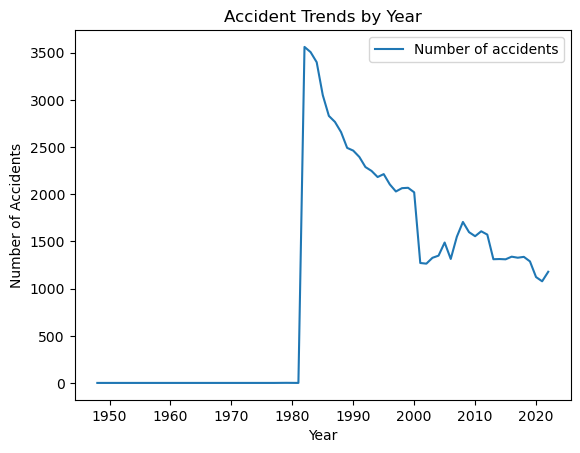

In [58]:
# Extracting year from Date Time Values

df['Year'] = df['Event Date'].dt.year

# Count number of accidents for each year

df_year = df.groupby('Year').size().reset_index(name='Number of accidents')

# Sort by year
df_year = df_year.sort_values('Year')
# Create line plot
df_year.plot(kind='line', x='Year', y='Number of accidents')

# Set title and labels
plt.title('Accident Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Show plot
plt.show();


The GitHub repository is the cloud-hosted directory containing all of your project files as well as their version history.

This repository link will be the project link that you include on your resume, LinkedIn, etc. for prospective employers to view your work. Note that we typically recommend that 3 links are highlighted (out of 5 projects) so don't stress too much about getting this one to be perfect! There will also be time after graduation for cosmetic touch-ups.

A professional GitHub repository has:

1. `README.md`
    * A file called `README.md` at the root of the repository directory, written in Markdown; this is what is rendered when someone visits the link to your repository in the browser
    * This file contains these sections:
       * Overview
       * Business Understanding
          * Include stakeholder and key business questions
       * Data Understanding and Analysis
          * Source of data
          * Description of data
          * Three visualizations (the same visualizations presented in the slides and notebook)
       * Conclusion
          * Summary of conclusions including three relevant findings
2. Commit history
   * Progression of updates throughout the project time period, not just immediately before the deadline
   * Clear commit messages
   * Commits from all team members (if a group project)
3. Organization
   * Clear folder structure
   * Clear names of files and folders
   * Easily-located notebook and presentation linked in the README
4. Notebook(s)
   * Clearly-indicated final notebook that runs without errors
   * Exploratory/working notebooks (can contain errors, redundant code, etc.) from all team members (if a group project)
5. `.gitignore`
   * A file called `.gitignore` at the root of the repository directory instructs Git to ignore large, unnecessary, or private files
     * Because it starts with a `.`, you will need to type `ls -a` in the terminal in order to see that it is there
   * GitHub maintains a [Python .gitignore](https://github.com/github/gitignore/blob/master/Python.gitignore) that may be a useful starting point for your version of this file
   * To tell Git to ignore more files, just add a new line to `.gitignore` for each new file name
     * Consider adding `.DS_Store` if you are using a Mac computer, as well as project-specific file names
     * If you are running into an error message because you forgot to add something to `.gitignore` and it is too large to be pushed to GitHub [this blog post](https://medium.com/analytics-vidhya/tutorial-removing-large-files-from-git-78dbf4cf83a?sk=c3763d466c7f2528008c3777192dfb95)(friend link) should help you address this

You wil submit a link to the GitHub repository on Canvas.

See the [Grading](#grading) section for further explanation of how the GitHub repository will be graded.

For further reading on creating professional notebooks and `README`s, check out [this reading](https://github.com/learn-co-curriculum/dsc-repo-readability-v2-2).

### Interactive Dashboard

The interactive dashboard is a collection of views that allows the viewer to change the views to understand different features in the data. This dashboard will be linked within your GitHub repository README.md file so that users can explore your analysis. Make sure you follow visual best practices that you have learned in this course. Below is an example of what you could produce for this assignment.
![tableau dashboard for aviation accidents](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v3/master/example_dashboard.png)

## Grading

***To pass this project, you must pass each project rubric objective.*** The project rubric objectives for Phase 1 are:

1. Data Communication
2. Authoring Jupyter Notebooks
3. Data Manipulation and Analysis with `pandas`
4. Interactive Data Visualization

### Data Communication

Communication is a key "soft skill". In [this survey](https://www.payscale.com/data-packages/job-skills), 46% of hiring managers said that recent college grads were missing this skill.

Because "communication" can encompass such a wide range of contexts and skills, we will specifically focus our Phase 1 objective on Data Communication. We define Data Communication as:

> Communicating basic data analysis results to diverse audiences via writing and live presentation

To further define some of these terms:

* By "basic data analysis" we mean that you are filtering, sorting, grouping, and/or aggregating the data in order to answer business questions. This project does not involve inferential statistics or machine learning, although descriptive statistics such as measures of central tendency are encouraged.
* By "results" we mean your ***three visualizations and recommendations***.
* By "diverse audiences" we mean that your presentation and notebook are appropriately addressing a business and data science audience, respectively.

Below are the definitions of each rubric level for this objective. This information is also summarized in the rubric, which is attached to the project submission assignment.

#### Exceeds Objective

Creates and describes appropriate visualizations for given business questions, where each visualization fulfills all elements of the checklist

> This "checklist" refers to the Data Visualization checklist within the larger Phase 1 Project Checklist

#### Meets Objective (Passing Bar)

Creates and describes appropriate visualizations for given business questions

> This objective can be met even if all checklist elements are not fulfilled. For example, if there is some illegible text in one of your visualizations, you can still meet this objective

#### Approaching Objective

Creates visualizations that are not related to the business questions, or uses an inappropriate type of visualization

> Even if you create very compelling visualizations, you cannot pass this objective if the visualizations are not related to the business questions

> An example of an inappropriate type of visualization would be using a line graph to show the correlation between two independent variables, when a scatter plot would be more appropriate

#### Does Not Meet Objective

Does not submit the required number of visualizations

### Authoring Jupyter Notebooks

According to [Kaggle's 2020 State of Data Science and Machine Learning Survey](https://www.kaggle.com/kaggle-survey-2020), 74.1% of data scientists use a Jupyter development environment, which is more than twice the percentage of the next-most-popular IDE, Visual Studio Code. Jupyter Notebooks allow for reproducible, skim-able code documents for a data science audience. Comfort and skill with authoring Jupyter Notebooks will prepare you for job interviews, take-home challenges, and on-the-job tasks as a data scientist.

The key feature that distinguishes *authoring Jupyter Notebooks* from simply *writing Python code* is the fact that Markdown cells are integrated into the notebook along with the Python cells in a notebook. You have seen examples of this throughout the curriculum, but now it's time for you to practice this yourself!

Below are the definitions of each rubric level for this objective. This information is also summarized in the rubric, which is attached to the project submission assignment.

#### Exceeds Objective

Uses Markdown and code comments to create a well-organized, skim-able document that follows all best practices

> Refer to the [repository readability reading](https://github.com/learn-co-curriculum/dsc-repo-readability-v2-2) for more tips on best practices

#### Meets Objective (Passing Bar)

Uses some Markdown to create an organized notebook, with an introduction at the top and a conclusion at the bottom

#### Approaching Objective

Uses Markdown cells to organize, but either uses only headers and does not provide any explanations or justifications, or uses only plaintext without any headers to segment out sections of the notebook

> Headers in Markdown are delineated with one or more `#`s at the start of the line. You should have a mixture of headers and plaintext (text where the line does not start with `#`)

#### Does Not Meet Objective

Does not submit a notebook, or does not use Markdown cells at all to organize the notebook

### Data Manipulation and Analysis with `pandas`

`pandas` is a very popular data manipulation library, with over 2 million downloads on Anaconda (`conda install pandas`) and over 19 million downloads on PyPI (`pip install pandas`) at the time of this writing. In our own internal data, we see that the overwhelming majority of Flatiron School DS grads use `pandas` on the job in some capacity.

Unlike in base Python, where the Zen of Python says "There should be one-- and preferably only one --obvious way to do it", there is often more than one valid way to do something in `pandas`. However there are still more efficient and less efficient ways to use it. Specifically, the best `pandas` code is *performant* and *idiomatic*.

Performant `pandas` code utilizes methods and broadcasting rather than user-defined functions or `for` loops. For example, if you need to strip whitespace from a column containing string data, the best approach would be to use the [`pandas.Series.str.strip` method](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html) rather than writing your own function or writing a loop. Or if you want to multiply everything in a column by 100, the best approach would be to use broadcasting (e.g. `df["column_name"] * 100`) instead of a function or loop. You can still write your own functions if needed, but only after checking that there isn't a built-in way to do it.

Idiomatic `pandas` code has variable names that are meaningful words or abbreviations in English, that are related to the purpose of the variables. You can still use `df` as the name of your DataFrame if there is only one main DataFrame you are working with, but as soon as you are merging multiple DataFrames or taking a subset of a DataFrame, you should use meaningful names. For example, `df2` would not be an idiomatic name, but `movies_and_reviews` could be.

We also recommend that you rename all DataFrame columns so that their meanings are more understandable, although it is fine to have acronyms. For example, `"col1"` would not be an idiomatic name, but `"USD"` could be.

Below are the definitions of each rubric level for this objective. This information is also summarized in the rubric, which is attached to the project submission assignment.

#### Exceeds Objective

Uses `pandas` to prepare data and answer business questions in an idiomatic, performant way

#### Meets Objective (Passing Bar)

Successfully uses `pandas` to prepare data in order to answer business questions

> This includes projects that _occasionally_ use base Python when `pandas` methods would be more appropriate (such as using `enumerate()` on a DataFrame), or occasionally performs operations that do not appear to have any relevance to the business questions

#### Approaching Objective

Uses `pandas` to prepare data, but makes significant errors

> Examples of significant errors include: the result presented does not actually answer the stated question, the code produces errors, the code _consistently_ uses base Python when `pandas` methods would be more appropriate, or the submitted notebook contains significant quantities of code that is unrelated to the presented analysis (such as copy/pasted code from the curriculum or StackOverflow)

#### Does Not Meet Objective

Unable to prepare data using `pandas`

> This includes projects that successfully answer the business questions, but do not use `pandas` (e.g. use only base Python, or use some other tool like R, Tableau, or Excel)

### Interactive Data Visualization

Tableau is a powerful data analysis tool that allows data to be presented in a manner that allows it to be easily digestible with visualizations and charts to aid in the simplification of the data and its analysis. Tableau contains many customizable features and makes it easy to share in many ways. We recommend you use Tableau for your interactive data visualization now that you have experience with it.

Here are the definitions of each rubric level for this objective.

#### Exceeds Objective

Creates an easy to use dashboard to answer business questions

#### Meets Objective

Successfully creates a dashboard to answer business questions

#### Approaching Objective

Creates a dashboard, but it is difficult to use

#### Does Not Meet Objective

Unable to create a dashboard

## Getting Started

Please start by reviewing the contents of this project description. If you have any questions, please ask your instructor ASAP.

Next, you will need to complete the [***Project Proposal***](#project_proposal) which must be reviewed by your instructor before you can continue with the project.

Then, you will need to create a GitHub repository. There are three options:
Interactive Data Visualization
1. Look at the [Phase 1 Project Templates and Examples repo](https://github.com/learn-co-curriculum/dsc-project-template) and follow the directions in the MVP branch.
2. Fork the [Phase 1 Project Repository](https://github.com/learn-co-curriculum/dsc-phase-1-project-v3), clone it locally, and work in the `student.ipynb` file. Make sure to also add and commit a PDF of your presentation to your repository with a file name of `presentation.pdf`.
3. Create a new repository from scratch by going to [github.com/new](https://github.com/new) and copying the data files from one of the above resources into your new repository. This approach will result in the most professional-looking portfolio repository, but can be more complicated to use. So if you are getting stuck with this option, try one of the above options instead.

## Summary

This project will give you a valuable opportunity to develop your data science skills using real-world data. The end-of-phase projects are a critical part of the program because they give you a chance to bring together all the skills you've learned, apply them to realistic projects for a business stakeholder, practice communication skills, and get feedback to help you improve. You've got this!